<h1 style="background-color:red;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 10px 10px;">Machine Learning for Stocks Trading</h1>

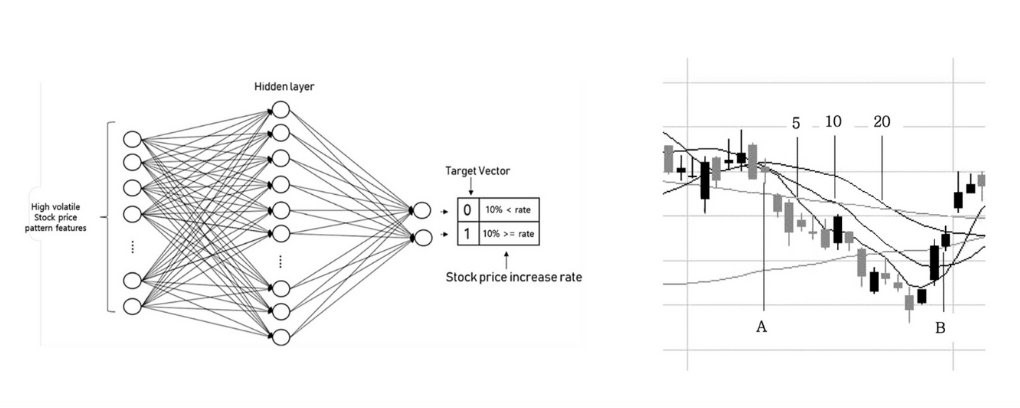

### Getting some historical data.

Stock Price Prediction using machine learning is the process of predicting the future value of a stock traded on a stock exchange for reaping profits. With multiple factors involved in predicting stock prices, it is challenging to predict stock prices with high accuracy, and this is where machine learning plays a vital role. 

We will be building our LSTM models using Tensorflow Keras and preprocessing our data using scikit-learn. These imports are used in different steps of the entire process, but it is good to club these statements together. Whenever we wish to import something new, just add the statement arbitrarily to the below group.

<a id="table"></a>
<h1 style="background-color:red;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Table Of Content</h1>

* [1. IMPORTING LIBRARIES](#1)
    
* [2. LOAD THE DATASET](#2)
  
* [3. TECHNICAL ANALYSIS INDICATORS](#3)

* [4. NEURAL NETWORK](#4)

* [5. BACKTESTING MODEL ](#5)

* [6. AUTHOR MESSAGE ](#6)

<a id="1"></a>
<h1 style="background-color:red;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 10px 10px;">Import Libraries</h1>

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import datetime
from datetime import date, time

#Install Yahoo Finance Libraries
try:
  import yfinance
except:
  !pip install -q yfinance 
  import yfinance 

try:
  import yahoofinancials
except:
  !pip install -q yahoofinancials 
  import yahoofinancials 

import yfinance as yf
from yahoofinancials import YahooFinancials 

import warnings 
warnings.filterwarnings("ignore")

Treating stock data as time-series, one can use past stock prices (and other parameters) to predict the stock prices for the next day or week. Machine learning models such as Recurrent Neural Networks (RNNs) or LSTMs are popular models applied to predicting time series data such as weather forecasting, election results, house prices, and, of course, stock prices. The idea is to weigh out the importance of recent and older data and determine which parameters affect the “current” or “next” day prices the most. The machine learning model assigns weights to each market feature and determines how much history the model should look at to predict future stock prices.

Go to finance.yahoo.com/ and search the company you wish to predict the stock of. For our example, we will look at the Tesla (TSLA) stock over 3 years.

Going to finance.yahoo.com/ in the “Historical Data” section, we see the stock data listed each day. We can filter out the time for which we wish to analyse and download the CSV file using the download button on the right.

<a id="2"></a>
<h1 style="background-color:red;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 10px 10px;">Load Dataset</h1>

In [2]:
#Download our Historical Data
df = yf.download('TSLA',
                 start='2000-01-01',
                 end=date.today(),
                 progress=False,)



YF.download() has changed argument auto_adjust default to True


In [3]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500
2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500
2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000
2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000
2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500


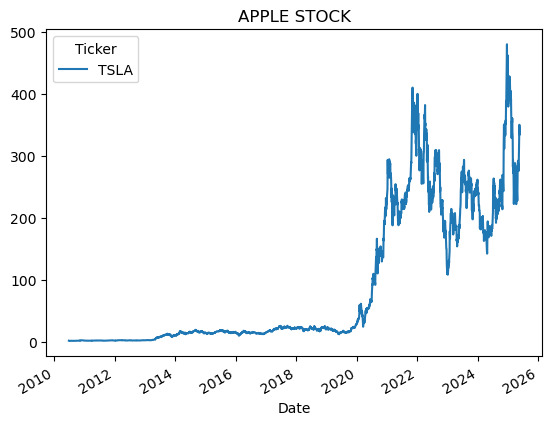

In [4]:
#Create a simple chart
df.plot(y='Close', title='APPLE STOCK')
plt.show()

In [5]:
# Flatten the MultiIndex columns
df.columns = [col[0] for col in df.columns]
print(df.columns)

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


<a id="3"></a>
<h1 style="background-color:red;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 10px 10px;">Creating Technical Analysis Indicators</h1> 

In [6]:
pip install pandas-ta

Note: you may need to restart the kernel to use updated packages.


As with any other machine learning model, it is always good to normalize or rescale the data within a fixed range when dealing with real data. This will avoid features with larger numeric values to unjustly interfere and bias the model and help achieve rapid convergence.

First, we define the features and the target as discussed above.

,Close,High,Low,Open,Volume,RSI(2),RSI(7),RSI(14),CCI(30),CCI(50),CCI(100)
Date,,,,,,,,,,,
2010-11-17,1.966000,2.050000,1.907333,2.013333,11250000,42.760531,69.700236,70.783665,150.212834,236.167196,362.534702
2010-11-18,1.992667,2.049333,1.928000,2.044667,14341500,63.034012,71.443507,71.753149,137.781371,214.555090,345.275945
2010-11-19,2.066000,2.091333,1.980000,2.010667,17257500,87.460641,75.893265,74.280617,138.690153,211.252585,361.454088
2010-11-22,2.226667,2.230000,2.100000,2.104667,22945500,96.781036,82.759912,78.763949,160.222337,233.454931,403.225178
2010-11-23,2.304667,2.378667,2.146000,2.219333,23667000,98.130358,85.154907,80.537681,164.201763,233.880206,405.588261


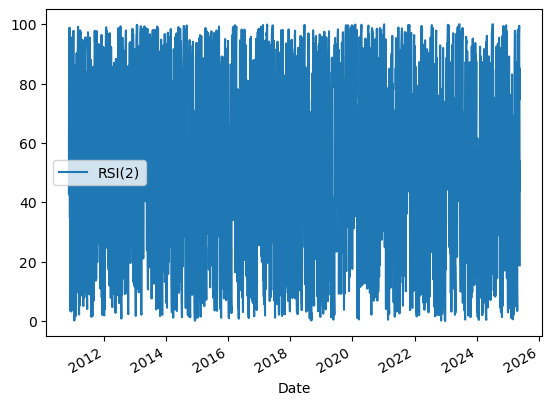

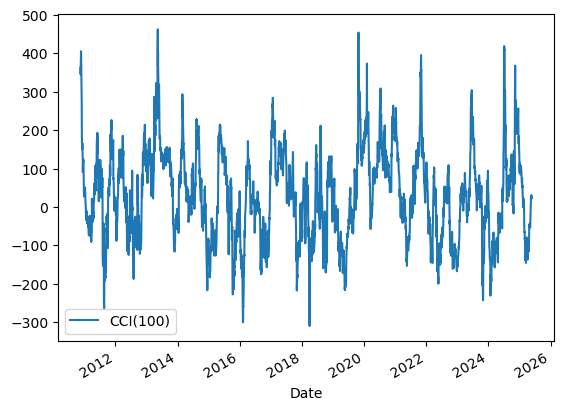

In [7]:
try:
  import pandas_ta as ta
except:
  !pip install -q pandas-ta
  import pandas_ta as ta 

df['RSI(2)'] = ta.rsi(df['Close'],length=2)
df['RSI(7)'] = ta.rsi(df['Close'],length=7)
df['RSI(14)'] = ta.rsi(df['Close'],length=14)
df['CCI(30)'] = ta.cci(close=df['Close'],length=30,high=df['High'],low=df['Low'])
df['CCI(50)'] = ta.cci(close=df['Close'],length=50,high=df['High'],low=df['Low'])
df['CCI(100)'] = ta.cci(close=df['Close'],length=100,high=df['High'],low=df['Low'])

#Drop NaN Values
df = df.dropna()

#Create a plot showing some of our indicators
df.plot(y='RSI(2)')
df.plot(y='CCI(100)')

#How's our current dataframe going
df.head()

Prepare our data labelling

What do we want to do over here?

When we place our trade: Buy at Open (over the next day). We want to close our trade: At the next day at open.

Formula:

Handling the returns this ways: Buy: Open(-1) - Closing: Open(-2)

We want to label our data in the following day.

BUY SIGNAL: Open(-2) > Open(-1)

SELL SIGNAL: Open(-2) < Open(-1)

Indicators the current situations, and our labels take a look ahead of time to determine if we have a pattern.

In [8]:
import numpy as np
df['LABEL'] = np.where( df['Open'].shift(-2).gt(df['Open'].shift(-1)),"1","0")
df = df.dropna()
df.head()

,Close,High,Low,Open,Volume,RSI(2),RSI(7),RSI(14),CCI(30),CCI(50),CCI(100),LABEL
Date,,,,,,,,,,,,
2010-11-17,1.966000,2.050000,1.907333,2.013333,11250000,42.760531,69.700236,70.783665,150.212834,236.167196,362.534702,0
2010-11-18,1.992667,2.049333,1.928000,2.044667,14341500,63.034012,71.443507,71.753149,137.781371,214.555090,345.275945,1
2010-11-19,2.066000,2.091333,1.980000,2.010667,17257500,87.460641,75.893265,74.280617,138.690153,211.252585,361.454088,1
2010-11-22,2.226667,2.230000,2.100000,2.104667,22945500,96.781036,82.759912,78.763949,160.222337,233.454931,403.225178,1
2010-11-23,2.304667,2.378667,2.146000,2.219333,23667000,98.130358,85.154907,80.537681,164.201763,233.880206,405.588261,1


<a id="4"></a>
<h1 style="background-color:red;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 10px 10px;">Creating a Neural Network</h1> 

Train and Test Sets for Stock Price Prediction
We split our data into training and testing sets. Shuffling is not permitted in time-series datasets. In the beginning, we take two steps worth of past data to predict the current value. Thus, the model will look at yesterday’s and today’s values to predict today’s closing price.

In [9]:
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error 
from math import sqrt  
from sklearn.metrics import r2_score 

#Fitting - Indicators and our Labelling
X = df[df.columns[6:-1]].values 
y = df['LABEL'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=1000) 
mlp.fit(X_train,y_train) 

predict_train = mlp.predict(X_train) 
predict_test = mlp.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix 

print(' Train Data Accuracy ')
print(classification_report(y_train,predict_train)) 

print( ' Testing Data Accuracy ' )
print( classification_report(y_test,predict_test) )

 Train Data Accuracy 
              precision    recall  f1-score   support

           0       0.49      0.83      0.62      1248
           1       0.54      0.19      0.28      1306

    accuracy                           0.50      2554
   macro avg       0.52      0.51      0.45      2554
weighted avg       0.52      0.50      0.45      2554

 Testing Data Accuracy 
              precision    recall  f1-score   support

           0       0.48      0.80      0.60       529
           1       0.50      0.19      0.27       566

    accuracy                           0.48      1095
   macro avg       0.49      0.50      0.44      1095
weighted avg       0.49      0.48      0.43      1095



Given the simplicity of the model and the data, we note that the loss reduction stagnates after only 20 epochs. You can observe this by plotting the training loss against the number of epochs, and LSTM does not learn much after 10-20 epochs.

<a id="5"></a>
<h1 style="background-color:red;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 10px 10px;">Backtesting our Model</h1> 

[]

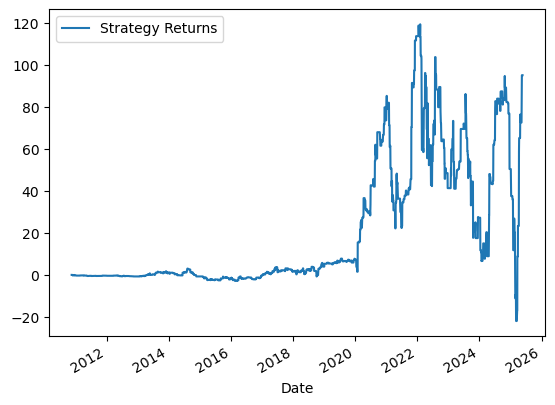

In [10]:
df['Prediction'] = np.append(predict_train,predict_test)
df['Strategy Returns'] = np.where( df['Prediction'].eq("1"),df['Open'].shift(-2)-df['Open'].shift(-1),0)

df['Strategy Returns'] = df['Strategy Returns'].cumsum() 

df.plot(y='Strategy Returns')
plt.plot()

In [11]:
prediction = df.iloc[-1]['Prediction'] 

if prediction=="1":
  print("Today's return forecast: UP")
else: 
  print("Today's return forecast: DOWN")

Today's return forecast: DOWN


<a id="6"></a>
<h1 style="background-color:red;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 10px 10px;">Author Message</h1>

We looked at how we can address the problem of predicting stock market prices by considering stock market data as a time series. Further, we looked into the theory of three existing methods used frequently for time series forecasting: simple moving average (SMA), exponential moving average (EMA), and LSTMs. We also used real-life stock data to predict prices of the Tesla stock using these three methods and conducted a comparative performance analysis using RMSE and MAPE error metrics.

However, a consensus of experts from the financial domain and the AI field says that ML techniques perform poorly in the real world to predict the market.  

Even if hundreds of variables and real-world market drivers are quantized and incorporated in the data and optimized using the best machine learning methods available, the model would still fall short of making valuable predictions when they matter. Experts note that AI models could not follow the trends disrupted by the COVID-19 pandemic – not during or even towards the end of it. Similarly, in general cases also, AI falls short of substituting human intelligence and intuition about the market trends: Effectiveness of Artificial Intelligence in Stock Market Prediction based on Machine Learning. Nevertheless, these shortcomings are only learning curves for developing robust stock price prediction models and analyzing the capabilities of existing models in further detail.